## Assignment 3 Sample Solution

This assignmemt is based on content discussed in modules 3 - 6 and test basic concepts of statistical inference theory and probability distributions.

In [1]:
#import packages
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

In [ ]:
stats.t.ppf

### Question 1

The Capital Asset Pricing Model (CAPM) is a financial model that assumes returns on a portfolio are normally distributed.  Suppose a portfolio has an average annual return of 14.7% (i.e., an average gain on 14.7%) with a standard deviation of 33%.  A return of 0% means the value of the portfolio doesn't change, a negative return means that the portfolio loses money, and a positive return means that the portfolio gains money. Determine the following:

1. What percentage of years does this portfolio lose money, (i.e. have a return less than 0%)?
2. What is the cutoff for the highest 15% of annual returns with this portfolio?

See CAPM here https://en.wikipedia.org/wiki/Capital_asset_pricing_model 

__Answer:__

1. What percent of years this portfolio lose money?

This would be the probability to have return less that 0%.    
Determine Z-score Z(0)=(0-0.147)/0.33 = -0.445, for this value of Z-score      
the probablity to have 0% or less return or percenile of 0% return is 0.3264.

**Answer: 32.64 % of years this portfolio lose money.**

In [2]:
# also, the probability can be calculated by calling `stats.norm.cdf()`
mean = 14.7
sigma = 33
x = 0

z = (x-mean)/sigma
print('Z-score for 0% is', z)

import scipy.stats as stats

cdf_x = stats.norm.cdf(z)*100

print('The percent of years the Capital Pricing Model (CAPM) returns loses money is %f' % cdf_x)

Z-score for 0% is -0.44545454545454544
The percent of years the Capital Pricing Model (CAPM) returns loses money is 32.799565


Probability of getting negative return is shown in purple.


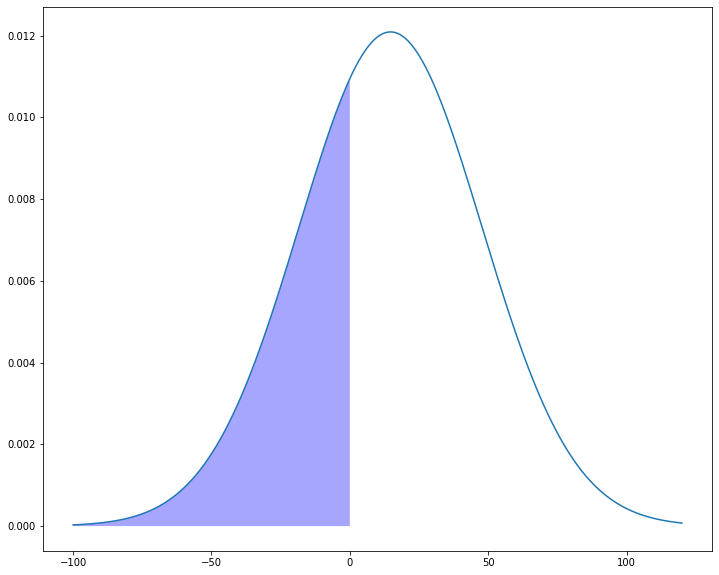

In [3]:
plt.figure(figsize=(12,10))

std = sigma

x_n = np.arange(-100, 120, 0.01)
y_n = stats.norm.pdf(np.arange(-100,120,0.01), loc=14.7, scale = sigma)

plt.plot(x_n, y_n)



plt.fill_between(x=np.arange(-100,0,0.01), 
                 y1= stats.norm.pdf(np.arange(-100,0,0.01),loc=14.7, scale = sigma) ,
                 facecolor='blue',
                 alpha=0.35)

print('Probability of getting negative return is shown in purple.')

b. What is the cutoff for the highest 15% of annual returns with this portfolio?

To find the cutoff for the highest 15% of the returns we need to find Z-score for (1-0.15) = 0.85.<br/>
Using the normal probability table 0.85 is at Z=1.04.
Then, the cutoff is (33*1.04 +14.7) = 49%.

One can estimate the 15% of highest cutoff from 68-95-99.7 rule.<br/>
68% of data fall between -std and +std, then 16% in the lower tail<br/> and
16% in the highest tail, so the cutoff of 16% is 14.7+33 = 47.7%,<br/>
and 15 % highest cutoff should be a bit larger then 47.7%.

**Answer: the cutoff of the highest 15% of annual returns is 49%.**

In [4]:
# Using probability density function

pdf = stats.norm(14.7, 33) 

# percentile at  1-0.15 = 0.85
pdf.ppf(0.85)

48.90230185329506

In [5]:
# or we may find how many standard deviations from the center that cutoff is:
stats.norm.ppf(0.85)

1.0364333894937898

And then find the return value from formula for Z-value:
Z=(value - mean)/sigma
value = Z*sigma + mean

In [6]:
mean + 1.0364*sigma

48.9012

highest 15% of annual returns shown in red.


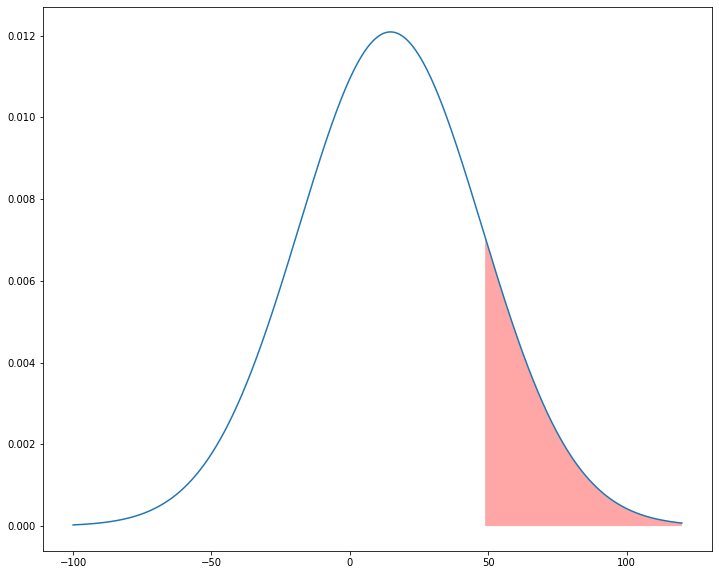

In [7]:
plt.figure(figsize=(12,10))

std = sigma

x_n = np.arange(-100, 120, 0.01)
y_n = stats.norm.pdf(np.arange(-100,120,0.01), loc=14.7, scale = sigma)

plt.plot(x_n, y_n)

plt.fill_between(x=np.arange(48.9,120,0.01), 
                 y1= stats.norm.pdf(np.arange(48.9,120.0,0.01),loc=14.7, scale = sigma) ,
                 facecolor='red',
                 alpha=0.35)
print('highest 15% of annual returns shown in red.')

**Question 2**

Past experience indicates that because of low morale, a company loses 20 hours a year per employee due to lateness and abstenteeism.  Assume that the standard deviation of the population is 6 and normally distributed.

The HR department implemented a new rewards system to increase employee morale, and after a few months it collected a random sample of 20 employees and the annualized absenteeism was 14.

1. Could you confirm that the new rewards system was effective with a 90% confidence?
2. An HR subject matter expert would be very happy if the program could reduce absenteeism by 20% (i.e. to 16 hours).  Given the current sampling parameters (sample size of 20 and std. dev. of population. 6), what is the probability that the new rewards system reduced absenteeism to 16 hours and you miss it?
3. What should the sample size be if you want β to be 5%

_1 .Could you confirm that the new rewards system was effective with a 90% confidence__
- This is one tail problem.
$$ Confidence \, level = 90 \Rightarrow \alpha = 0.1$$

In [8]:
mean = 20
std = 6
smpl_size = 20
smpl_mean = 14.0

# For 90% confidence interval the alpha is 0.1
alpha = 0.10

# 90-percent interval can be found by removing 5% off each end of the distribution
# z-value at 5% is 
# Since the sample size is only 20, the t-student distribution should be used with degree of freedom df=20 -1
# the notion that data in population are normally distributed suggest 
# that t-distribution can be used for sample description

z_5 = stats.norm.ppf(alpha/2)
print('Z-value for 90% confidence interval is', z_5)

error_interval = z_5 * (std/math.sqrt(smpl_size))

conf_interval = (smpl_mean - error_interval, smpl_mean + error_interval)

print('The confidence interval is ', conf_interval)

Z-value for 90% confidence interval is -1.6448536269514729
The confidence interval is  (16.206802713740345, 11.793197286259655)


Confidence interval does not include the previous (null) observation of 20 hours. Therefore, the null hypothesis $H_0$ (population mean = 20) can be rejected and sample confirms the effectveness of the new reward system with 90% confidence.

In [9]:
# Hypothesis can be tested by p-value
# This time we calculate probability to observe sample mean of 14 by chance given 
# that the null hypothesis is true
# Z-value can be found from the difference of the sample mean and the null hypothesis value

# first we find the standard error, this is the same as above
std_error = std/math.sqrt(smpl_size)

Z_value = (smpl_mean - mean)/std_error

# Since the Z_value is negative in this case we take left tail of CDF to find the probability to observe 14 or smaller

p_value = stats.norm.cdf(Z_value)

print(std,std_error,Z_value,p_value)

6 1.3416407864998738 -4.47213595499958 3.872108215522035e-06


-1.2815515655446004
18.280618149662597


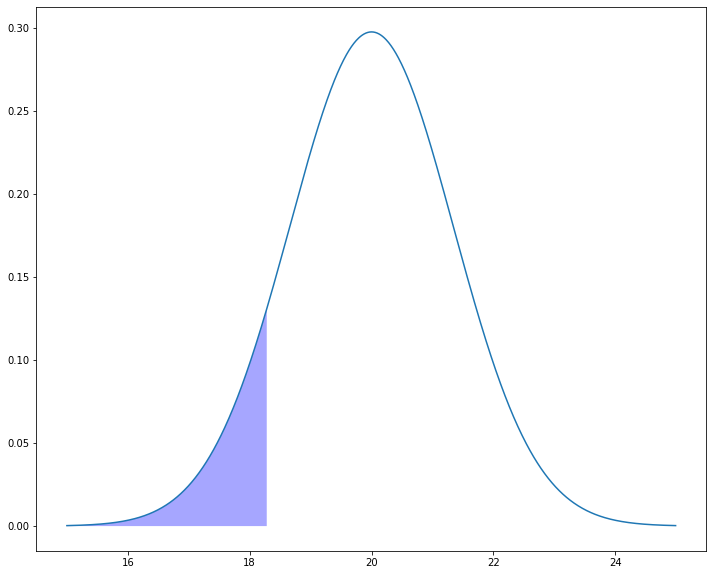

In [10]:
plt.figure(figsize=(12,10))

std_error = std/math.sqrt(smpl_size)

x_n = np.arange(15, 25, 0.01)
y_n = stats.norm.pdf(np.arange(15,25,0.01), loc=20, scale = std_error)

plt.plot(x_n, y_n)

z_score_01 = stats.norm.ppf(0.1)

x_01 = z_score_01* std_error + 20
print(z_score_01)
print(x_01)

plt.fill_between(x=np.arange(15,18.28,0.01), 
                 y1= stats.norm.pdf(np.arange(15,18.288,0.01),loc=20, scale = std_error) ,
                 facecolor='blue',
                 alpha=0.35)


Found p-value is much smaller than significance level $\alpha$ = 0.10 and the null hypothesis is rejected. Since in this case we can switch to one-tail test calculated p-value is compared to the $\alpha$ and not $\alpha/2$.

__2. An HR subject matter expert would be very happy if the program could reduce absenteeism by 20% (i.e. to 16 hours).  Given the current sampling parameters (sample size of 20 and std. dev. of population. 6), what is the probability that the new rewards system reduced absenteeism to 16 hours and you miss it?__

This questions an alternative hypothesis. A Type II error occurs when a false null hypothesis is not rejected.
We need to find β = P(X > X_crt, given that μ = 16), this parameter is calculated using the alternative hypothesis distribution, centered at 16. But to find critical value at which this an alterntive hypothesis is rejected we get back to inspect the null hypothesis curve. From the null hyposthesis side we can find this critical value at given significance level. See figure below.

Text(18.5, 0.02, 'Type 2 Error')

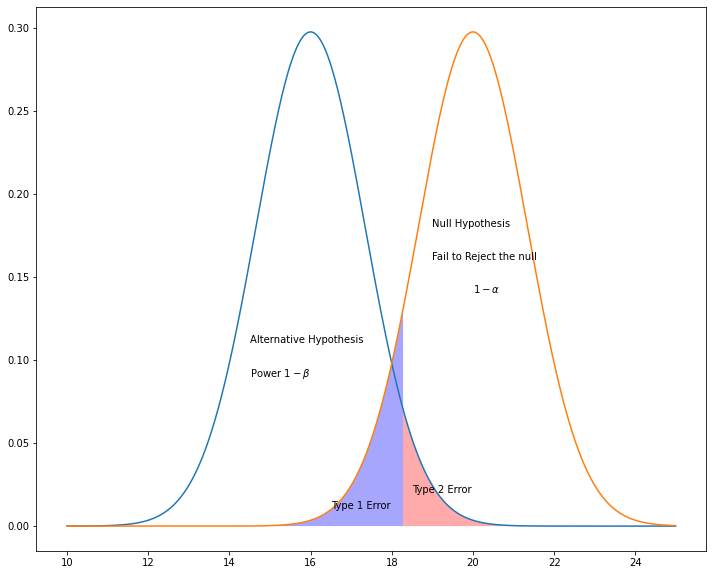

In [11]:
plt.figure(figsize=(12,10))

x1=np.arange(10,25,0.01)
y1= stats.norm.pdf(np.arange(10,25,0.01), loc=16, scale=std_error)
plt.plot(x1,y1)

plt.plot(x1=np.arange(10,25.0,0.01), y2= stats.norm.pdf(np.arange(10,25,0.01), loc=16, scale=std_error))

x2=np.arange(10,25.0,0.01)
y2= stats.norm.pdf(np.arange(10,25.0,0.01),loc = 20, scale=std_error)
plt.plot(x2,y2)


plt.fill_between(x=np.arange(10,18.28,0.01), 
                 y1= stats.norm.pdf(np.arange(10,18.28,0.01), loc=16, scale=std_error),facecolor='white')

plt.fill_between(x=np.arange(18.28,25,0.01), 
                 y1= stats.norm.pdf(np.arange(18.28,25,0.01), loc=16, scale=std_error) ,
                 facecolor='red',
                 alpha=0.5)

plt.fill_between(x=np.arange(10,18.28,0.01), 
                 y1= stats.norm.pdf(np.arange(10,18.28,0.01),loc=20, scale=std_error) ,
                 facecolor='blue',
                 alpha=0.35)

plt.fill_between(x=np.arange(18.28,25,0.01), 
                 y1= stats.norm.pdf(np.arange(18.28,25,0.01),loc=20, scale=std_error),
                 facecolor='white',
                 alpha=0.35)

plt.text(x=19, y=0.18, s= "Null Hypothesis")
plt.text(x=19, y=0.16, s= 'Fail to Reject the null ')
plt.text(x=20.0, y=0.14, s=r'$1- \alpha$')
plt.text(x=14.5, y=0.11, s= "Alternative Hypothesis")
plt.text(x=14.5, y=0.09, s= 'Power ' r'$1-\beta$')
plt.text(x=16.5, y=0.01, s= "Type 1 Error")
plt.text(x=18.5, y=0.02, s= "Type 2 Error")

In [12]:
# For given significance level 0.1 the critical Z-value is 

Z_critical = stats.norm.ppf(0.1)

# and corresponding value of x (hours) from the null curve

x_critical = mean + Z_critical * std_error

print('Critical Z-value: ', Z_critical)
print('Critical x value: ', x_critical)

Critical Z-value:  -1.2815515655446004
Critical x value:  18.280618149662597


In [13]:
# Next, using this critical value of x we can find power of test and parameter beta from the alternative curve

z_beta = (x_critical - 16)/std_error

power_of_test = stats.norm.cdf(z_beta)
beta = 1- power_of_test
print("The probability that the fail to reject the null hypothesis when the alternate hypothesis is true is {0:.2%}".format(beta))
print("\n")
print("The probability that the reject the null hypothesis with the alternate hypothesis is true is {0:.2%}".format(power_of_test))



The probability that the fail to reject the null hypothesis when the alternate hypothesis is true is 4.46%


The probability that the reject the null hypothesis with the alternate hypothesis is true is 95.54%


__3. What should the sample size be if you want β to be 5%__

In [14]:
#In order to get beta value 5% we need to change standard error by uncreasing the sample size
# So we should set alpha to 0.10 and beta to 0.05

alpha_new = 0.10
beta_new = 0.05

# From the the graph above the distance between centres of null and alternative curves can be expressed as
# distance from alternative curve centre to new critical x value and distance from null center to that new critical x value
# Z_beta_new*SE + Z_alpha_new*SE

Z_beta_new = stats.norm.ppf(1 - beta_new)
Z_alpha_new = stats.norm.ppf(1 - alpha_new)

print('required values of Z_beta_new and Z_alpha_new are ', Z_beta_new, Z_alpha_new)


required values of Z_beta_new and Z_alpha_new are  1.6448536269514722 1.2815515655446004


In [15]:
((1.645+1.282)*6/4)**2

19.276490250000002

It is not surprising these values are the same since both curves are normal.


$
\begin{equation*}
Distance = 20-16 = 4 \\
Distance = Z_\alpha * SE + Z_\beta * SE\\
Distance = 1.645\, SE + 1.282\,SE = 2.927 \, SE \\
SE = \frac{\sigma}{\sqrt{n}} \\
n = \left(\frac{2.927\times6}{4}\right)^{2} = 19.27
\end{equation*}
$

Thus, sample size of minimum 19 is required to achieve a beta of less then 5%. In our sample the sample size was 20 and the beta value was less than 5%.

In [16]:
# Let's check if the estimate is good

# For sample size n=19 the Z value will be
z_new_sample = stats.norm.ppf(0.10)

# for larger sample size the standard error should be smaller
new_std_error = 6/math.sqrt(19)
# New critiacal x value is
x_new_critical = 20 + z_new_sample * new_std_error

# New beta or type II error:
# From the alternative side this new critical x value will correspond to T-score
z_new_altern = (x_new_critical-16)/new_std_error

# and new beta value or the probability to land to the right of the new T-score
new_beta = 1-stats.norm.cdf(z_new_altern)

print('New z-value for 0.05 in the null curve: ', z_new_sample)
print('New standard error: ', new_std_error)
print('New critical x value: ', x_new_critical)
print("New z-score from the alternative side: ", z_new_altern)
print('New beta value: ', new_beta)
print('new significance level: ', stats.norm.cdf(-1.7056))

New z-value for 0.05 in the null curve:  -1.2815515655446004
New standard error:  1.3764944032233704
New critical x value:  18.23595144258571
New z-score from the alternative side:  1.6243810634825153
New beta value:  0.05214725300729306
new significance level:  0.04404128969403949


With sample size n=19 we may have significance level $\alpha = 0.10$ (5%) and type II error 0.052 (or 5.2%). The sample size of 20 chosen in study give slightly better beta value, minimum sample size required is 19.

### Question 3

Chi-Square Goodness of fit

Please access and review **section 6.3.5** in the OpenIntro Statistics textbook:

Diez, D., Barr, C. & Çetinkaya-Rundel, M. (2017). OpenIntro Statistics (3rd Ed.). https://www.openintro.org/stat/textbook.php?stat_book=os

Given the information in section 6.3.5, write python code for the following:

 - Calculate the expected values based on the geometric distribution with a probability of 53.2%
 - Compare the expected vs. the observed values from the textbook using the Chi-Square distribution
 - Reach a conclusion
 - Explain what is the business impact of your conclusion

In [17]:
obs_numbers_days = [1532, 760, 338, 194, 74, 33, 17]
total_days = sum(obs_numbers_days)
 
# If the stock market being up or down on a given day is independent from all other day,
# the number of days until an Up day should follow a geometric distribution.
# This would be our null hypothesis.
# to test this hypothesis we need to find how well these observed number of days 
# can be fitted by geometric distribution.

# The S&P500 was positive on 53.2% of those days.
# This can be taken as probability p to obtain geometric distribution
p=0.532

# Using geometric distribution we can compute expected number of days 
# from 1 through 6 and the remaining would be 7 and more. 

expected_days = []

for days in range(6):
    expected_days.append(round(p*(1-p)**days*total_days,0))
    
# The expected number of 7 or more days is the rest of CDF:
expected_days.append(round((1-stats.geom.cdf(6,p))*total_days,0))

In [18]:
print('The expected values are: ', expected_days)

The expected values are:  [1568.0, 734.0, 344.0, 161.0, 75.0, 35.0, 31.0]


In [19]:
# next the statsmodel chi-square distribution may be used:

chi_test = stats.chisquare(obs_numbers_days, expected_days)

print('Chis-square value: ', chi_test.statistic)
print('p-value: ', chi_test.pvalue)

Chis-square value:  15.066337549525954
p-value:  0.019746985983350823


The low value of p-value 0.02 (smaller than significance test 0.05) indicates that the null hypothesis is rejected.    
In this case the null hypothesis means that the stock market being UP or DOWN is independent from previous days and the distribution of observed number of days would follow the geometric distribution. 

Since the null hypothesis is rejected, the trading days are NOT independent. 

#### Q-3 (4th Edition of OpenIntro Statistics)

In the 4th edition of the OpenIntro Statistics textbook new dataset was published.
Here is the solution for new dataset.

In [20]:
obs_days_4th = [ 717, 369, 155, 69, 28, 14, 10]

total_days_4th = 1362

# The S&P500 was positive on 54.5% of those days.
# This can be taken as probability p to obtain geometric distribution
p_4th=0.545

# Using geometric distribution we can compute expected number of days 
# from 1 through 6 and the remaining would be 7 and more. 

expected_days_4th = []

for days in range(6):
    expected_days_4th.append(round(p_4th*(1-p_4th)**days*total_days_4th,0))
    
# The expected number of 7 or more days is the rest of CDF:
expected_days_4th.append(round((1-stats.geom.cdf(6,p_4th))*total_days_4th,0))

In [21]:
print('The expected values are: ', expected_days_4th)

The expected values are:  [742.0, 338.0, 154.0, 70.0, 32.0, 14.0, 12.0]


In [22]:
# next the statsmodel chi-square distribution may be used:

chi_test_4th = stats.chisquare(obs_days_4th, expected_days_4th)

print('Chis-square value: ', chi_test_4th.statistic)
print('p-value: ', chi_test_4th.pvalue)

Chis-square value:  4.539625879683935
p-value:  0.6040592872240453


This dataset shows opposite results. 
The p-value is approximetaly 0.6; this value is larger 
than the significance level and null hypothesis cannot be rejected, i.e. we cannot reject 
the notion that trading days are independent. 

NOTE. Since data sets given in 3rd and 4th edition of the book are so different, I doubt they are real. This is just aan exercise.
